# Analysis on Relationship Between Education and Expenditure  in US

<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Final Project</div>
<div style="text-align: right"><strong>Team member:</strong></div>
<div style="text-align: right">Jianchao Li (001054645) </div>
<div style="text-align: right">Yidan Sun (001059769) </div>
<div style="text-align: right">Jingwen Wang (001052378) </div>
<div style="text-align: right">22 April,2020 </div>

<center>
<img src="american.PNG" width=600 />
</center>

# Background
 ### “Resouceful youths lead to a resourceful nation; strong youths lead to a strong country”. As famous Chinese scholar Qichao Liang said. 

 ### Aiming at figure out relationship between revenue, expenditure and education, we decide to analyze the data of financial and achievement data on state level of America. 

# Content
## Part 1 Data Scrubing
## Part 2 Specific Analysis on MA
## Part 3 Curve Fitting 
## Part 4 Prediction Towards Students' Future Performance

# Part 1 Data Scrubing

In this part, we have collected data, observed the data set and modified it a little bit.
The code that we'll use:

In [78]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.lines import Line2D
from scipy.optimize import curve_fit
#curve_fit is used for figure out relationship between education expenditure and students/ grades

In [79]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy
rng = numpy.random

# Choose Dataset and Read it:
The data set we use is **"us-education-datasets-unification- project"** , which bring together multiple facets of U.S. education data into one convenient CSV, including expenditure of each state and grades of students on math and reading. Timeline from 1996 to 2016. 
[us-education-datasets-unification- project](https://www.kaggle.com/noriuk/us-education-datasets-unification-project)

In [80]:
data = pd.read_csv("states_all.csv")
data

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.398961,260.892247,196.764414,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,2017_NORTH_DAKOTA,NORTH_DAKOTA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,244.243515,288.172322,221.519266,262.720477
1914,2017_RHODE_ISLAND,RHODE_ISLAND,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,237.554934,277.180126,223.353443,269.553823
1915,2017_SOUTH_CAROLINA,SOUTH_CAROLINA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,234.043993,274.673821,213.127835,265.767860
1916,2017_SOUTH_DAKOTA,SOUTH_DAKOTA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,241.588947,286.376160,221.750123,259.753002


After removing empty cells, we obtain the scrubbed dataset(from 1492 rows to 413 rows).

In [81]:
data = data.dropna(axis=0,how='any')
data

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
408,2000_ALABAMA,ALABAMA,2000,730184.0,4885917.0,425978.0,3003814.0,1456125.0,5003267.0,2551713.0,...,59749.0,56951.0,42512.0,472686.0,201358.0,739992.0,217.941053,262.158206,206.880030,258.777258
410,2000_ARIZONA,ARIZONA,2000,814807.0,5479168.0,534619.0,2481089.0,2463460.0,5397194.0,2488932.0,...,72295.0,65526.0,49501.0,567626.0,236933.0,877696.0,218.766619,270.715406,205.347275,270.519439
411,2000_ARKANSAS,ARKANSAS,2000,450751.0,2844855.0,254735.0,2126099.0,464021.0,2683400.0,1531232.0,...,35724.0,34873.0,28918.0,281091.0,131511.0,449959.0,217.062870,261.363713,212.881797,268.004817
412,2000_CALIFORNIA,CALIFORNIA,2000,5941946.0,46628207.0,4024940.0,26877920.0,15725347.0,45829753.0,23514388.0,...,489043.0,441877.0,357789.0,3804640.0,1707952.0,6140814.0,213.565125,262.171027,205.916588,264.494066
414,2000_CONNECTICUT,CONNECTICUT,2000,530363.0,5884078.0,234321.0,2298931.0,3350826.0,5605280.0,3189123.0,...,44682.0,42597.0,32591.0,354391.0,155734.0,562179.0,234.243375,281.902486,229.381143,266.468618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,2015_VERMONT,VERMONT,2015,85184.0,1996795.0,105333.0,1546600.0,344862.0,1969415.0,983532.0,...,5975.0,6173.0,6271.0,48722.0,26002.0,87866.0,243.250399,290.355191,230.098617,260.655136
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,96851.0,95221.0,90391.0,772414.0,386781.0,1283590.0,246.612622,287.709299,228.971255,269.430665
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,82404.0,79483.0,89258.0,656797.0,336808.0,1087030.0,244.981422,286.513108,225.892889,273.961831
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,60999.0,61084.0,66253.0,489919.0,263896.0,867800.0,243.310211,289.077749,223.356356,267.250881


We sorted the mean total revenue of each state.

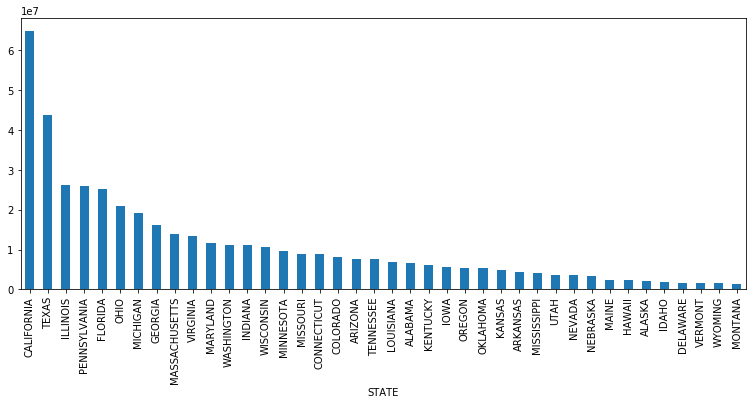

In [82]:
x = data['TOTAL_REVENUE'].groupby(data['STATE']).mean()
ax = x.sort_values(ascending=False).plot(kind='bar', figsize=(13, 5));

We also sorted the mean instruction expenditure of each state.

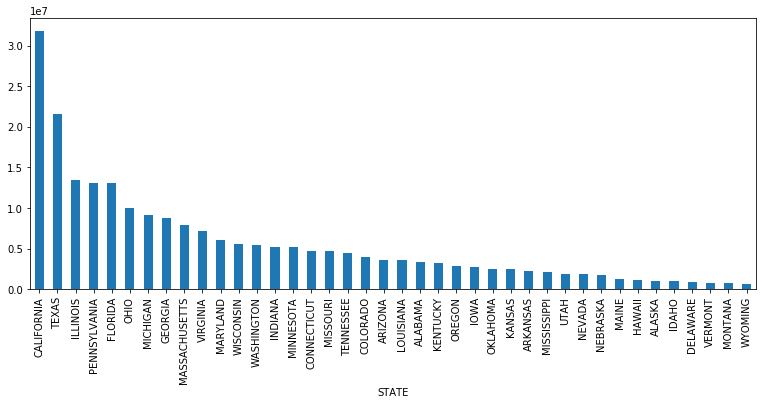

In [83]:
x = data['INSTRUCTION_EXPENDITURE'].groupby(data['STATE']).mean()
ax = x.sort_values(ascending=False).plot(kind='bar', figsize=(13, 5));

This is the ratio of instruction expenditure and total revenue of each state.

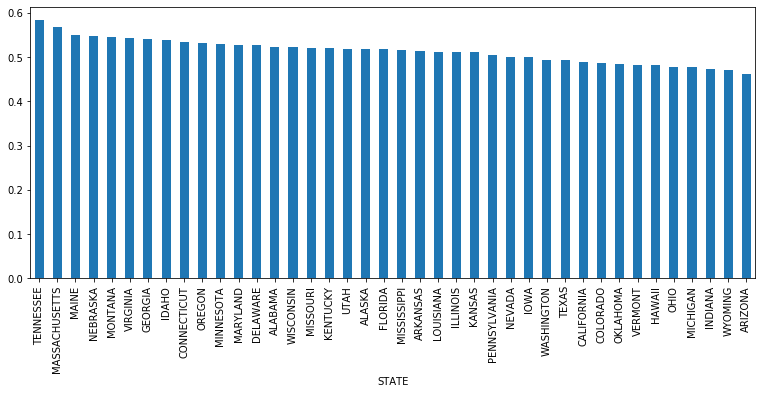

In [84]:
x = data['INSTRUCTION_EXPENDITURE'].groupby(data['STATE']).mean()/data['TOTAL_REVENUE'].groupby(data['STATE']).mean()
ax = x.sort_values(ascending=False).plot(kind='bar', figsize=(13, 5));

# Part 2 Specific Analysis on MA


As typical state with top educational quality, we chose MA for futher analysis to display various expenditure with pie chart. We can observe that the investment in instruction accounts for a large proportion.

In [85]:
dataMA = data[data['STATE'] == 'MASSACHUSETTS']
dataMA

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
429,2000_MASSACHUSETTS,MASSACHUSETTS,2000,958907.0,9464271.0,480898.0,3926522.0,5056851.0,9466363.0,5624037.0,...,78287.0,74527.0,58322.0,611990.0,272575.0,975150.0,234.959613,283.123246,233.748410,266.499769
582,2003_MASSACHUSETTS,MASSACHUSETTS,2003,967200.0,11591832.0,712487.0,4757632.0,6121713.0,11382398.0,6521028.0,...,73478.0,78635.0,62389.0,599893.0,288329.0,980459.0,241.664527,286.520694,227.604259,266.408969
684,2005_MASSACHUSETTS,MASSACHUSETTS,2005,955225.0,12976279.0,761359.0,5434971.0,6779949.0,12726283.0,7203922.0,...,71410.0,76223.0,65635.0,582539.0,296511.0,971909.0,247.337049,291.513541,231.279439,261.013686
786,2007_MASSACHUSETTS,MASSACHUSETTS,2007,945070.0,14407777.0,754202.0,6485380.0,7168195.0,14315518.0,8053653.0,...,71443.0,73318.0,68757.0,572523.0,296032.0,962958.0,252.430320,297.923344,235.753462,267.450720
888,2009_MASSACHUSETTS,MASSACHUSETTS,2009,932437.0,15298022.0,1181681.0,5974489.0,8141852.0,15174814.0,8885949.0,...,71078.0,72093.0,67973.0,569489.0,290502.0,957053.0,252.254790,298.854347,233.749463,266.799519
990,2011_MASSACHUSETTS,MASSACHUSETTS,2011,924903.0,15396681.0,1197383.0,5783240.0,8416058.0,15150898.0,8685894.0,...,70404.0,72758.0,67460.0,569243.0,287055.0,953369.0,253.396456,298.512431,236.773867,268.833964
1092,2013_MASSACHUSETTS,MASSACHUSETTS,2013,920968.0,16114783.0,818054.0,6428534.0,8868195.0,16201905.0,9097982.0,...,70862.0,72116.0,67429.0,569089.0,287478.0,955739.0,253.033785,300.568235,232.373156,257.351243
1194,2015_MASSACHUSETTS,MASSACHUSETTS,2015,916130.0,16985185.0,778939.0,6808436.0,9397810.0,16972319.0,9774884.0,...,70892.0,72176.0,70997.0,571237.0,294897.0,964026.0,250.565778,296.908571,235.275423,268.391236


In [86]:
from collections import Counter
pie_INSTRUCTION=dataMA['INSTRUCTION_EXPENDITURE'].groupby(data['STATE']).sum()
pie_SUPPORT=dataMA['SUPPORT_SERVICES_EXPENDITURE'].groupby(data['STATE']).sum()
pie_OTHER=dataMA['OTHER_EXPENDITURE'].groupby(data['STATE']).sum()
pie_CAPITAL=dataMA['CAPITAL_OUTLAY_EXPENDITURE'].groupby(data['STATE']).sum()


#pie_INSTRUCTION
#pie_SUPPORT
#pie_OTHER
pie_CAPITAL

STATE
MASSACHUSETTS    6437024.0
Name: CAPITAL_OUTLAY_EXPENDITURE, dtype: float64

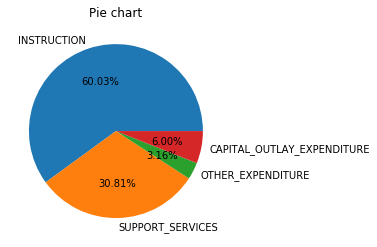

In [87]:

labels=['INSTRUCTION','SUPPORT_SERVICES','OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE']
X=[68019121.0,34912717.0,3583003.0,6797150.0]  
 
fig = plt.figure()
plt.pie(X,labels=labels,autopct='%1.2f%%') 
plt.title("Pie chart")
  
plt.show()

In [88]:
'可爱极了！！！'

'可爱极了！！！'

We show the total revenue and instuction expenditure of MA during last two decades with line chart. From the trend of the line, we can observe that the revenue is growing by years but had a little setback in 2008. We think maybe it is caused by the **financial crisis**.

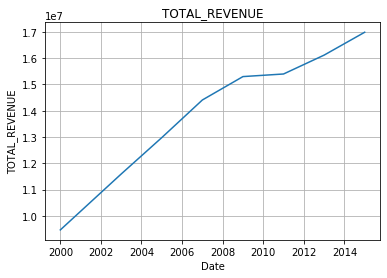

In [89]:
plt.plot(dataMA['YEAR'],dataMA['TOTAL_REVENUE'])
plt.title('TOTAL_REVENUE')
plt.ylabel('TOTAL_REVENUE')
plt.xlabel('Date')
plt.grid(True)
plt.show()

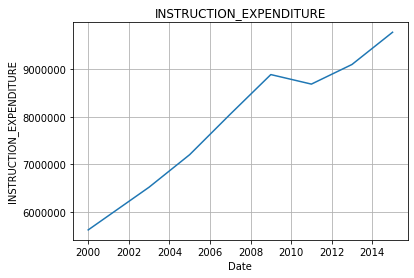

In [90]:
plt.plot(dataMA['YEAR'],dataMA['INSTRUCTION_EXPENDITURE'])
plt.title('INSTRUCTION_EXPENDITURE')
plt.ylabel('INSTRUCTION_EXPENDITURE')
plt.xlabel('Date')
plt.grid(True)
plt.show()

# Part 3 Curve Fitting 

### Based on the scatter diagram we generated from real data, we observed that the relationship between scores and expenditure fit with logarithm function.

In [91]:
def func(x, a, b, c):
    return a * np.log(b * x) + c

In [92]:
#Mass
x = dataMA['INSTRUCTION_EXPENDITURE']
y = dataMA['AVG_MATH_4_SCORE']
numpy.polyfit(numpy.log(x), y, 1)

# y ≈ 32.40018695 log(x) -266.23255882

array([  32.40018695, -266.23255882])

/Users/lijianchao/opt/anaconda2/envs/theano/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


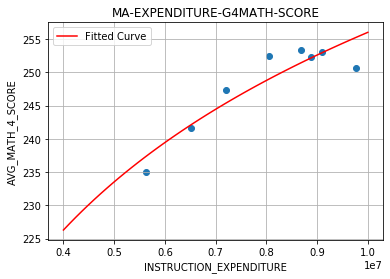

In [93]:
xM = np.linspace(4000000,10000000,50)   # changed boundary conditions to avoid division by 0
yM = func(xM, 32.40018695, 1,  -266.23255882)

popt, pcov = curve_fit(func, xM, yM, maxfev=10000000)

plt.figure()
#plt.plot(xM, yM, 'ko', label="Original Noised Data")
plt.plot(xM, func(xM, *popt), 'r-', label="Fitted Curve")
plt.legend()

plt.scatter(x,y)
plt.title('MA-EXPENDITURE-G4MATH-SCORE')
plt.ylabel('AVG_MATH_4_SCORE')
plt.xlabel('INSTRUCTION_EXPENDITURE')
plt.grid(True)

In [94]:
dataVA = data[data['STATE'] == 'VIRGINIA']
dataVA

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
454,2000_VIRGINIA,VIRGINIA,2000,1132673.0,8911426.0,491873.0,3761983.0,4657570.0,9154676.0,4823780.0,...,92073.0,87455.0,70337.0,721485.0,329148.0,1144915.0,230.394809,276.674992,225.009436,268.144530
607,2003_VIRGINIA,VIRGINIA,2003,1175458.0,10504167.0,698716.0,4087720.0,5717731.0,10746679.0,5661291.0,...,90729.0,95586.0,76477.0,733990.0,354832.0,1192092.0,239.203089,281.676643,223.340359,264.267365
709,2005_VIRGINIA,VIRGINIA,2005,1203697.0,12182657.0,826830.0,4871813.0,6484014.0,12385157.0,6565022.0,...,88883.0,95716.0,78913.0,732004.0,372317.0,1213616.0,240.497568,284.371628,225.813711,260.968327
811,2007_VIRGINIA,VIRGINIA,2007,1220440.0,14176385.0,890144.0,5796043.0,7490198.0,14700853.0,7630837.0,...,90397.0,93896.0,85413.0,732104.0,380413.0,1230857.0,243.521130,287.625905,227.136725,257.421203
913,2009_VIRGINIA,VIRGINIA,2009,1235064.0,15251481.0,914507.0,6317714.0,8019260.0,15510318.0,8194237.0,...,93708.0,92075.0,87839.0,741139.0,381320.0,1245340.0,243.071297,286.069755,226.527568,270.060990
1015,2011_VIRGINIA,VIRGINIA,2011,1250852.0,14655345.0,1427301.0,5351177.0,7876867.0,14675815.0,7861076.0,...,93770.0,93361.0,89324.0,753846.0,376658.0,1257883.0,245.333618,289.255411,226.378435,259.208371
1117,2013_VIRGINIA,VIRGINIA,2013,1264880.0,15322318.0,1108879.0,5874323.0,8339116.0,15634918.0,8445746.0,...,95625.0,95778.0,88709.0,767349.0,377252.0,1273825.0,246.177457,288.142960,228.555738,263.684138
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,96851.0,95221.0,90391.0,772414.0,386781.0,1283590.0,246.612622,287.709299,228.971255,269.430665


In [95]:
#VIRGINIA
x = dataVA['INSTRUCTION_EXPENDITURE']
y = dataVA['AVG_MATH_8_SCORE']
numpy.polyfit(numpy.log(x), y, 1)

# y ≈ 9.95546205 log(x) +115.70039561

array([18.63548243, -8.81650583])

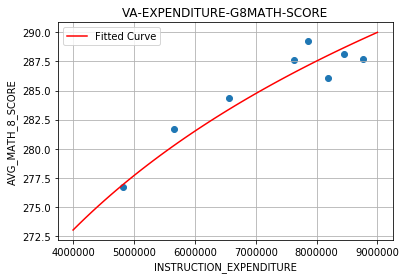

In [96]:
xM = np.linspace(4000000,9000000,50)   # changed boundary conditions to avoid division by 0
yM = func(xM, 20.93117384, 1, -45.16883473)

popt, pcov = curve_fit(func, xM, yM, maxfev=10000000)

plt.figure()
#plt.plot(xM, yM, 'ko', label="Original Noised Data")
plt.plot(xM, func(xM, *popt), 'r-', label="Fitted Curve")
plt.legend()

plt.scatter(x,y)
plt.title('VA-EXPENDITURE-G8MATH-SCORE')
plt.ylabel('AVG_MATH_8_SCORE')
plt.xlabel('INSTRUCTION_EXPENDITURE')
plt.grid(True)

In [97]:
x = dataVA['INSTRUCTION_EXPENDITURE']
y = dataVA['AVG_READING_4_SCORE']
numpy.polyfit(numpy.log(x), y, 1)

# y ≈ 9.95546205 log(x) +115.70039561

array([  7.12322683, 114.08529108])

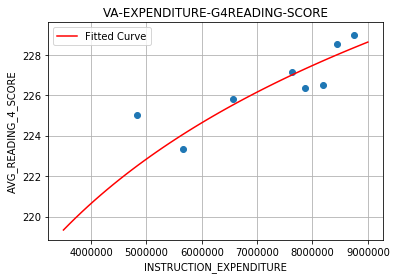

In [98]:
xM = np.linspace(3500000,9000000,50)   # changed boundary conditions to avoid division by 0
yM = func(xM, 9.83852625, 1, 71.08845913)

popt, pcov = curve_fit(func, xM, yM, maxfev=10000000)

plt.figure()
#plt.plot(xM, yM, 'ko', label="Original Noised Data")
plt.plot(xM, func(xM, *popt), 'r-', label="Fitted Curve")
plt.legend()

plt.scatter(x,y)
plt.title('VA-EXPENDITURE-G4READING-SCORE')
plt.ylabel('AVG_READING_4_SCORE')
plt.xlabel('INSTRUCTION_EXPENDITURE')
plt.grid(True)

In [99]:
dataDE = data[data['STATE'] == 'DELAWARE']
dataDE

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
568,2003_DELAWARE,DELAWARE,2003,111282.0,1242436.0,91986.0,794472.0,355978.0,1317447.0,673997.0,...,9097.0,10222.0,7292.0,74352.0,34770.0,117668.0,235.859425,277.158369,223.928811,253.172594
670,2005_DELAWARE,DELAWARE,2005,112562.0,1431710.0,106513.0,894498.0,430699.0,1480157.0,761786.0,...,8896.0,10492.0,7555.0,75448.0,36298.0,120937.0,239.716912,280.953543,225.838459,258.721275
772,2007_DELAWARE,DELAWARE,2007,114678.0,1694929.0,102114.0,1071957.0,520858.0,1705204.0,825084.0,...,9085.0,10176.0,7681.0,75619.0,37555.0,122574.0,241.794895,282.992083,225.070542,254.828792
874,2009_DELAWARE,DELAWARE,2009,116804.0,1718993.0,109682.0,1047418.0,561893.0,1798244.0,877678.0,...,9672.0,9519.0,8317.0,77418.0,39091.0,126801.0,239.490569,283.829473,225.513087,258.048580
976,2011_DELAWARE,DELAWARE,2011,119878.0,1759170.0,192182.0,1010026.0,556962.0,1808905.0,964284.0,...,9691.0,9569.0,8570.0,79106.0,38322.0,128946.0,240.359832,282.769966,225.130511,254.935218
1078,2013_DELAWARE,DELAWARE,2013,118685.0,1930466.0,151096.0,1124112.0,655258.0,1924626.0,1030897.0,...,10069.0,9993.0,8536.0,81303.0,38483.0,131687.0,243.107758,282.338299,225.771651,271.009087
1180,2015_DELAWARE,DELAWARE,2015,121845.0,2017075.0,137544.0,1142333.0,737198.0,1975093.0,1072395.0,...,10533.0,10090.0,8782.0,83409.0,39845.0,134847.0,238.678019,279.810244,223.698697,273.048030


In [100]:
x = dataDE['INSTRUCTION_EXPENDITURE']
y = dataDE['AVG_READING_8_SCORE']
numpy.polyfit(numpy.log(x), y, 1)

array([  36.91525569, -244.585199  ])

/Users/lijianchao/opt/anaconda2/envs/theano/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


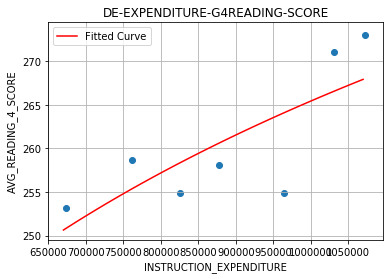

In [101]:
xM = np.linspace(670000,1070000,50)   # changed boundary conditions to avoid division by 0
yM = func(xM, 36.91525569, 1,  -244.585199)

popt, pcov = curve_fit(func, xM, yM, maxfev=10000000)

plt.figure()
#plt.plot(xM, yM, 'ko', label="Original Noised Data")
plt.plot(xM, func(xM, *popt), 'r-', label="Fitted Curve")
plt.legend()

plt.scatter(x,y)
plt.title('DE-EXPENDITURE-G4READING-SCORE')
plt.ylabel('AVG_READING_4_SCORE')
plt.xlabel('INSTRUCTION_EXPENDITURE')
plt.grid(True)

# Part 4 Prediction Towards Students' Future Performance

In [102]:
!pip install sklearn

In [103]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
clf = LogisticRegression()

Approach 1:  By using raw data, we convert continuous data to muticlass data. The outcome did not in line with our expectations 🤔☹️😤.

In [104]:
data = pd.read_csv('states_all.csv', index_col = 'PRIMARY_KEY')

In [105]:
data = data.drop(['GRADES_12_G', 'GRADES_9_12_G','GRADES_1_8_G', 'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_ALL_G'],1)
data = data.dropna()
display(data)

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_4_G,GRADES_8_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
PRIMARY_KEY,,,,,,,,,,,,,,,,,,
1996_ALABAMA,ALABAMA,1996,735912.0,3365113.0,334858.0,2138717.0,891538.0,3572283.0,1987018.0,935115.0,322883.0,286699.0,57098.0,58305.0,211.646974,256.594863,210.920767,260.276441
1996_ARIZONA,ARIZONA,1996,764681.0,4143304.0,378917.0,1798363.0,1966024.0,4391555.0,1860007.0,1193260.0,220650.0,877190.0,62793.0,60514.0,217.575940,267.874834,206.529788,263.283638
1996_ARKANSAS,ARKANSAS,1996,452907.0,2183384.0,192152.0,1296247.0,694985.0,2297381.0,1264275.0,636106.0,127007.0,203555.0,33855.0,37064.0,215.846436,261.652745,208.837716,271.834590
1996_CALIFORNIA,CALIFORNIA,1996,5460484.0,31282981.0,2603882.0,17061474.0,11617625.0,31561692.0,16880730.0,9222569.0,2362407.0,2580639.0,435217.0,406456.0,209.129083,262.772478,201.912591,269.197451
1996_COLORADO,COLORADO,1996,655679.0,3891203.0,194998.0,1664676.0,2031529.0,4075165.0,2052264.0,1127563.0,143767.0,588209.0,52524.0,52269.0,225.805858,275.608214,221.653243,268.168154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015_VERMONT,VERMONT,2015,85184.0,1996795.0,105333.0,1546600.0,344862.0,1969415.0,983532.0,566649.0,61871.0,58856.0,5975.0,6173.0,243.250399,290.355191,230.098617,260.655136
2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,5075509.0,627473.0,1086722.0,96851.0,95221.0,246.612622,287.709299,228.971255,269.430665
2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,4510672.0,546926.0,1601069.0,82404.0,79483.0,244.981422,286.513108,225.892889,273.961831


In [106]:
X = data[['TOTAL_REVENUE','INSTRUCTION_EXPENDITURE']]
y = data['AVG_MATH_4_SCORE']
X_train, X_test, y_train, y_test = train_test_split(X,y)
X

,TOTAL_REVENUE,INSTRUCTION_EXPENDITURE
PRIMARY_KEY,,
1996_ALABAMA,3365113.0,1987018.0
1996_ARIZONA,4143304.0,1860007.0
1996_ARKANSAS,2183384.0,1264275.0
1996_CALIFORNIA,31282981.0,16880730.0
1996_COLORADO,3891203.0,2052264.0
...,...,...
2015_VERMONT,1996795.0,983532.0
2015_VIRGINIA,15857524.0,8755896.0
2015_WASHINGTON,13709442.0,6508964.0


In [107]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encodedYTrain = lab_enc.fit_transform(y_train)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(encodedYTrain))

encodedYTest = lab_enc.fit_transform(y_test)
print(utils.multiclass.type_of_target(y_test))
print(utils.multiclass.type_of_target(encodedYTest))
encodedYTrain

continuous
multiclass
continuous
multiclass


array([ 85, 112, 229, 169, 222, 191, 146, 121, 114, 117, 115, 159, 195,
        92, 134, 236, 196,  57,  97, 242,  33,  24, 168, 207, 108, 144,
       193, 166,  44, 113,  86, 228, 212, 219,  26, 136,  43, 132,  73,
       192, 105, 202,  14,  82, 197, 152, 151, 186,   8, 104, 208,  27,
       216, 116, 221,  59, 220, 201,  21,  89,  94,  84,  53, 122, 177,
        65,  63,  15, 213,  90, 239,  80,  77,  50,  30, 211, 224, 140,
       119,  96, 137, 218,  70, 110, 187,  69,  20,  56, 180, 199,  17,
       184, 174, 158, 235,  28, 123, 241, 130,  11, 111, 232, 103, 217,
        64, 167,  19, 214,  16, 141, 157,   4, 138,  83, 106, 155, 120,
       204,  66, 124,  34, 205, 233,  47, 175, 190,  75, 149, 161,  99,
        87, 118, 102, 244,   9,  54, 145, 165, 171,  39, 100, 206,  10,
        36,  72, 215,   6,  78,  88, 182,  51,  55, 209, 185, 173,   5,
        48,   1, 210,  95, 131, 225,  76,  52, 227,  13,  12, 135,  62,
        22, 163, 143, 172,  79,   7,   3, 150, 164, 240, 178,  4

In [108]:
#fit on training data
clf.fit(X_train, encodedYTrain)

#predict test
preds = clf.predict(X_test)
print((preds == y_test).mean())

#measure performance
print(clf.score(X_test,encodedYTest))

#See if overfit
print(clf.score(X_train,encodedYTrain))

0.0
0.0
0.012195121951219513


/Users/lijianchao/opt/anaconda2/envs/theano/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


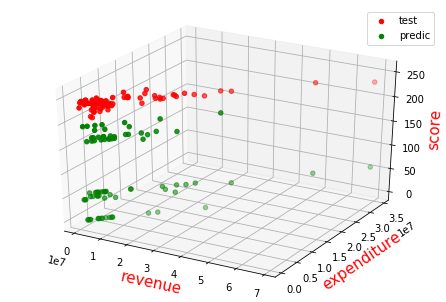

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x1 = X_test['TOTAL_REVENUE']  
y1 = X_test['INSTRUCTION_EXPENDITURE']
z1 = y_test.astype(int)
 
x2 = X_test['TOTAL_REVENUE']  
y2 = X_test['INSTRUCTION_EXPENDITURE']
z2 = clf.predict(X_test)
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x1, y1, z1, c='r', label='test')
ax.scatter(x2, y2, z2, c='g', label='predic')
 
ax.legend(loc='best')
 
ax.set_zlabel('score', fontdict={'size': 15, 'color': 'red'})
ax.set_ylabel('expenditure', fontdict={'size': 15, 'color': 'red'})
ax.set_xlabel('revenue', fontdict={'size': 15, 'color': 'red'})
 
plt.show()

Approach 2: Based on raw data, we cast float to integer to fit the method's regression. There are limited improvement compared with approach 1 😲😶😉.

In [110]:
data = pd.read_csv('states_all.csv', index_col = 'PRIMARY_KEY')
data = data.dropna()
data

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
PRIMARY_KEY,,,,,,,,,,,,,,,,,,,,,
2000_ALABAMA,ALABAMA,2000,730184.0,4885917.0,425978.0,3003814.0,1456125.0,5003267.0,2551713.0,1319053.0,...,59749.0,56951.0,42512.0,472686.0,201358.0,739992.0,217.941053,262.158206,206.880030,258.777258
2000_ARIZONA,ARIZONA,2000,814807.0,5479168.0,534619.0,2481089.0,2463460.0,5397194.0,2488932.0,1573568.0,...,72295.0,65526.0,49501.0,567626.0,236933.0,877696.0,218.766619,270.715406,205.347275,270.519439
2000_ARKANSAS,ARKANSAS,2000,450751.0,2844855.0,254735.0,2126099.0,464021.0,2683400.0,1531232.0,804253.0,...,35724.0,34873.0,28918.0,281091.0,131511.0,449959.0,217.062870,261.363713,212.881797,268.004817
2000_CALIFORNIA,CALIFORNIA,2000,5941946.0,46628207.0,4024940.0,26877920.0,15725347.0,45829753.0,23514388.0,12429070.0,...,489043.0,441877.0,357789.0,3804640.0,1707952.0,6140814.0,213.565125,262.171027,205.916588,264.494066
2000_CONNECTICUT,CONNECTICUT,2000,530363.0,5884078.0,234321.0,2298931.0,3350826.0,5605280.0,3189123.0,1634888.0,...,44682.0,42597.0,32591.0,354391.0,155734.0,562179.0,234.243375,281.902486,229.381143,266.468618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015_VERMONT,VERMONT,2015,85184.0,1996795.0,105333.0,1546600.0,344862.0,1969415.0,983532.0,566649.0,...,5975.0,6173.0,6271.0,48722.0,26002.0,87866.0,243.250399,290.355191,230.098617,260.655136
2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,5075509.0,...,96851.0,95221.0,90391.0,772414.0,386781.0,1283590.0,246.612622,287.709299,228.971255,269.430665
2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,4510672.0,...,82404.0,79483.0,89258.0,656797.0,336808.0,1087030.0,244.981422,286.513108,225.892889,273.961831


In [111]:
X = data[['TOTAL_REVENUE','INSTRUCTION_EXPENDITURE']]
y = data['AVG_MATH_4_SCORE']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=42)

In [112]:
#fit on training data
clf.fit(X_train, y_train.astype(int))

#predict test
preds = clf.predict(X_test)

#measure performance
print(clf.score(X_test,y_test.astype(int)))

#See if overfit
print(clf.score(X_train,y_train.astype(int)))

0.06535947712418301
0.0915032679738562


/Users/lijianchao/opt/anaconda2/envs/theano/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


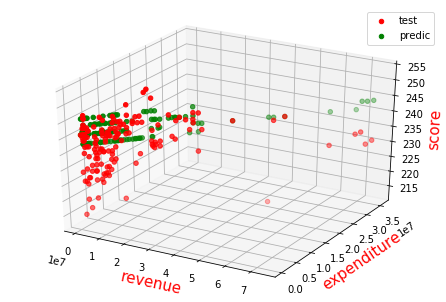

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x1 = X_test['TOTAL_REVENUE']  
y1 = X_test['INSTRUCTION_EXPENDITURE']
z1 = y_test.astype(int)
 
x2 = X_test['TOTAL_REVENUE']  
y2 = X_test['INSTRUCTION_EXPENDITURE']
z2 = clf.predict(X_test)
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x1, y1, z1, c='r', label='test')
ax.scatter(x2, y2, z2, c='g', label='predic')
 
ax.legend(loc='best')
 
ax.set_zlabel('score', fontdict={'size': 15, 'color': 'red'})
ax.set_ylabel('expenditure', fontdict={'size': 15, 'color': 'red'})
ax.set_xlabel('revenue', fontdict={'size': 15, 'color': 'red'})
 
plt.show()

Approach 3: By filling the empty cells using sklearn.impute, the outcome is in line with our expectations 😁😊😎. 

In [114]:
data = pd.read_csv('states_all.csv', index_col = 'PRIMARY_KEY')

In [115]:
from sklearn.impute import SimpleImputer

data = data.drop(['GRADES_12_G', 'GRADES_9_12_G','GRADES_1_8_G', 'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_ALL_G'],1)
data = data.drop(columns = ['STATE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'])
my_imputer = SimpleImputer()
data_imputed = my_imputer.fit_transform(data)
print (data_imputed)
# array转换成df
data_imputed = pd.DataFrame(data_imputed,columns=data.columns)
data_imputed

[[1.99200000e+03 9.17541566e+05 2.67888500e+06 ... 5.79480000e+04
  5.80250000e+04 2.08327876e+02]
 [1.99200000e+03 9.17541566e+05 1.04959100e+06 ... 9.74800000e+03
  8.78900000e+03 2.34797280e+02]
 [1.99200000e+03 9.17541566e+05 3.25807900e+06 ... 5.54330000e+04
  4.90810000e+04 2.15253932e+02]
 ...
 [2.01700000e+03 9.17541566e+05 9.10204493e+06 ... 6.91665080e+04
  6.81065374e+04 2.34043993e+02]
 [2.01700000e+03 9.17541566e+05 9.10204493e+06 ... 6.91665080e+04
  6.81065374e+04 2.41588947e+02]
 [2.01700000e+03 9.17541566e+05 9.10204493e+06 ... 6.91665080e+04
  6.81065374e+04 2.36057019e+02]]


,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_4_G,GRADES_8_G,AVG_MATH_4_SCORE
0,1992.0,917541.566176,2.678885e+06,3.041770e+05,1.659028e+06,7.156800e+05,2.653798e+06,1.481703e+06,7.350360e+05,429950.933824,1.740530e+05,57948.000000,58025.000000,208.327876
1,1992.0,917541.566176,1.049591e+06,1.067800e+05,7.207110e+05,2.221000e+05,9.724880e+05,4.983620e+05,3.509020e+05,429950.933824,3.745100e+04,9748.000000,8789.000000,234.797280
2,1992.0,917541.566176,3.258079e+06,2.978880e+05,1.369815e+06,1.590376e+06,3.401580e+06,1.435908e+06,1.007732e+06,429950.933824,6.091140e+05,55433.000000,49081.000000,215.253932
3,1992.0,917541.566176,1.711959e+06,1.785710e+05,9.587850e+05,5.746030e+05,1.743022e+06,9.643230e+05,4.834880e+05,429950.933824,1.452120e+05,34632.000000,36011.000000,210.206028
4,1992.0,917541.566176,2.626002e+07,2.072470e+06,1.654651e+07,7.641041e+06,2.713883e+07,1.435892e+07,8.520926e+06,429950.933824,2.044688e+06,418418.000000,363296.000000,208.398961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,2017.0,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,429950.933824,9.034675e+05,69166.507966,68106.537377,244.243515
1914,2017.0,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,429950.933824,9.034675e+05,69166.507966,68106.537377,237.554934
1915,2017.0,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,429950.933824,9.034675e+05,69166.507966,68106.537377,234.043993
1916,2017.0,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,429950.933824,9.034675e+05,69166.507966,68106.537377,241.588947


In [116]:
data_imputed = data_imputed.dropna()
data_imputed

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_4_G,GRADES_8_G,AVG_MATH_4_SCORE
0,1992.0,917541.566176,2.678885e+06,3.041770e+05,1.659028e+06,7.156800e+05,2.653798e+06,1.481703e+06,7.350360e+05,429950.933824,1.740530e+05,57948.000000,58025.000000,208.327876
1,1992.0,917541.566176,1.049591e+06,1.067800e+05,7.207110e+05,2.221000e+05,9.724880e+05,4.983620e+05,3.509020e+05,429950.933824,3.745100e+04,9748.000000,8789.000000,234.797280
2,1992.0,917541.566176,3.258079e+06,2.978880e+05,1.369815e+06,1.590376e+06,3.401580e+06,1.435908e+06,1.007732e+06,429950.933824,6.091140e+05,55433.000000,49081.000000,215.253932
3,1992.0,917541.566176,1.711959e+06,1.785710e+05,9.587850e+05,5.746030e+05,1.743022e+06,9.643230e+05,4.834880e+05,429950.933824,1.452120e+05,34632.000000,36011.000000,210.206028
4,1992.0,917541.566176,2.626002e+07,2.072470e+06,1.654651e+07,7.641041e+06,2.713883e+07,1.435892e+07,8.520926e+06,429950.933824,2.044688e+06,418418.000000,363296.000000,208.398961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,2017.0,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,429950.933824,9.034675e+05,69166.507966,68106.537377,244.243515
1914,2017.0,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,429950.933824,9.034675e+05,69166.507966,68106.537377,237.554934
1915,2017.0,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,429950.933824,9.034675e+05,69166.507966,68106.537377,234.043993
1916,2017.0,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,429950.933824,9.034675e+05,69166.507966,68106.537377,241.588947


In [117]:
X = data_imputed.loc[:,['TOTAL_REVENUE','INSTRUCTION_EXPENDITURE']]
y = data_imputed.loc[:,'AVG_MATH_4_SCORE']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=100)

In [118]:
#fit on training data
clf.fit(X_train, y_train.astype(int))

#predict test
preds = clf.predict(X_test)

#measure performance
print(clf.score(X_test,y_test.astype(int)))

#See if overfit
print(clf.score(X_train,y_train.astype(int)))

0.703125
0.7230590961761297


/Users/lijianchao/opt/anaconda2/envs/theano/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


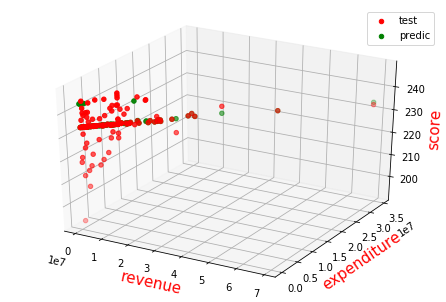

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x1 = X_test['TOTAL_REVENUE']  
y1 = X_test['INSTRUCTION_EXPENDITURE']
z1 = y_test.astype(int)
 
x2 = X_test['TOTAL_REVENUE']  
y2 = X_test['INSTRUCTION_EXPENDITURE']
z2 = clf.predict(X_test)
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x1, y1, z1, c='r', label='test')
ax.scatter(x2, y2, z2, c='g', label='predic')
 
ax.legend(loc='best')
 
ax.set_zlabel('score', fontdict={'size': 15, 'color': 'red'})
ax.set_ylabel('expenditure', fontdict={'size': 15, 'color': 'red'})
ax.set_xlabel('revenue', fontdict={'size': 15, 'color': 'red'})
 
plt.show()

Based on approach 3, we do a little optimization.

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [121]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train.astype(int))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [122]:
#fit on training data
clf.fit(X_train, y_train.astype(int))

#predict test
preds = clf.predict(X_test)

#measure performance
print(clf.score(X_test,y_test.astype(int)))

#See if overfit
print(clf.score(X_train,y_train.astype(int)))

0.703125
0.7230590961761297


/Users/lijianchao/opt/anaconda2/envs/theano/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


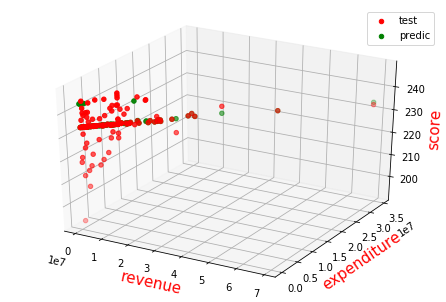

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x1 = X_test['TOTAL_REVENUE']  
y1 = X_test['INSTRUCTION_EXPENDITURE']
z1 = y_test.astype(int)
 
x2 = X_test['TOTAL_REVENUE']  
y2 = X_test['INSTRUCTION_EXPENDITURE']
z2 = clf.predict(X_test)
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x1, y1, z1, c='r', label='test')
ax.scatter(x2, y2, z2, c='g', label='predic')
 
ax.legend(loc='best')
 
ax.set_zlabel('score', fontdict={'size': 15, 'color': 'red'})
ax.set_ylabel('expenditure', fontdict={'size': 15, 'color': 'red'})
ax.set_xlabel('revenue', fontdict={'size': 15, 'color': 'red'})
 
plt.show()

We also do the prediction on math score of grade 8 using approach 3 to test the feasibility. The outcome is pretty good!☺️

In [124]:
data = pd.read_csv('states_all.csv', index_col = 'PRIMARY_KEY')

In [125]:
from sklearn.impute import SimpleImputer

data = data.drop(['GRADES_12_G', 'GRADES_9_12_G','GRADES_1_8_G', 'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_ALL_G'],1)
data = data.drop(columns = ['STATE','AVG_MATH_4_SCORE','AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'])
my_imputer = SimpleImputer()
data_imputed = my_imputer.fit_transform(data)
print (data_imputed)
# array to df
data_imputed = pd.DataFrame(data_imputed,columns=data.columns)
data_imputed

[[1.99200000e+03 9.17541566e+05 2.67888500e+06 ... 5.79480000e+04
  5.80250000e+04 2.52187522e+02]
 [1.99200000e+03 9.17541566e+05 1.04959100e+06 ... 9.74800000e+03
  8.78900000e+03 2.78461453e+02]
 [1.99200000e+03 9.17541566e+05 3.25807900e+06 ... 5.54330000e+04
  4.90810000e+04 2.65366278e+02]
 ...
 [2.01700000e+03 9.17541566e+05 9.10204493e+06 ... 6.91665080e+04
  6.81065374e+04 2.74673821e+02]
 [2.01700000e+03 9.17541566e+05 9.10204493e+06 ... 6.91665080e+04
  6.81065374e+04 2.86376160e+02]
 [2.01700000e+03 9.17541566e+05 9.10204493e+06 ... 6.91665080e+04
  6.81065374e+04 2.73415854e+02]]


,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_4_G,GRADES_8_G,AVG_MATH_8_SCORE
0,1992.0,917541.566176,2.678885e+06,3.041770e+05,1.659028e+06,7.156800e+05,2.653798e+06,1.481703e+06,7.350360e+05,429950.933824,1.740530e+05,57948.000000,58025.000000,252.187522
1,1992.0,917541.566176,1.049591e+06,1.067800e+05,7.207110e+05,2.221000e+05,9.724880e+05,4.983620e+05,3.509020e+05,429950.933824,3.745100e+04,9748.000000,8789.000000,278.461453
2,1992.0,917541.566176,3.258079e+06,2.978880e+05,1.369815e+06,1.590376e+06,3.401580e+06,1.435908e+06,1.007732e+06,429950.933824,6.091140e+05,55433.000000,49081.000000,265.366278
3,1992.0,917541.566176,1.711959e+06,1.785710e+05,9.587850e+05,5.746030e+05,1.743022e+06,9.643230e+05,4.834880e+05,429950.933824,1.452120e+05,34632.000000,36011.000000,256.312090
4,1992.0,917541.566176,2.626002e+07,2.072470e+06,1.654651e+07,7.641041e+06,2.713883e+07,1.435892e+07,8.520926e+06,429950.933824,2.044688e+06,418418.000000,363296.000000,260.892247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,2017.0,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,429950.933824,9.034675e+05,69166.507966,68106.537377,288.172322
1914,2017.0,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,429950.933824,9.034675e+05,69166.507966,68106.537377,277.180126
1915,2017.0,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,429950.933824,9.034675e+05,69166.507966,68106.537377,274.673821
1916,2017.0,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,429950.933824,9.034675e+05,69166.507966,68106.537377,286.376160


In [126]:
X = data_imputed.loc[:,['TOTAL_REVENUE','INSTRUCTION_EXPENDITURE']]
y = data_imputed.loc[:,'AVG_MATH_8_SCORE']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=100)

In [127]:
#fit on training data
clf.fit(X_train, y_train.astype(int))

#predict test
preds = clf.predict(X_test)

#measure performance
print(clf.score(X_test,y_test.astype(int)))

#See if overfit
print(clf.score(X_train,y_train.astype(int)))

0.7135416666666666
0.7253765932792584


/Users/lijianchao/opt/anaconda2/envs/theano/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


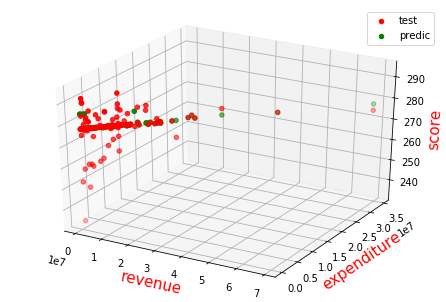

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x1 = X_test['TOTAL_REVENUE']  
y1 = X_test['INSTRUCTION_EXPENDITURE']
z1 = y_test.astype(int)
 
x2 = X_test['TOTAL_REVENUE']  
y2 = X_test['INSTRUCTION_EXPENDITURE']
z2 = clf.predict(X_test)
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x1, y1, z1, c='r', label='test')
ax.scatter(x2, y2, z2, c='g', label='predic')
 
ax.legend(loc='best')
 
ax.set_zlabel('score', fontdict={'size': 15, 'color': 'red'})
ax.set_ylabel('expenditure', fontdict={'size': 15, 'color': 'red'})
ax.set_xlabel('revenue', fontdict={'size': 15, 'color': 'red'})
 
plt.show()

Inverse the prediction: Using math and reading score of grade 8 to predict the investment, the outcome is limited😅

In [129]:
data = pd.read_csv('states_all.csv', index_col = 'PRIMARY_KEY')

In [130]:
from sklearn.impute import SimpleImputer

data = data.drop(['GRADES_12_G', 'GRADES_9_12_G','GRADES_1_8_G', 'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_ALL_G'],1)
data = data.drop(columns = ['STATE','AVG_READING_4_SCORE', 'AVG_MATH_4_SCORE'])
my_imputer = SimpleImputer()
data_imputed = my_imputer.fit_transform(data)
print (data_imputed)
# array to df
data_imputed = pd.DataFrame(data_imputed,columns=data.columns)
data_imputed

[[1.99200000e+03 9.17541566e+05 2.67888500e+06 ... 5.80250000e+04
  2.52187522e+02 2.63683325e+02]
 [1.99200000e+03 9.17541566e+05 1.04959100e+06 ... 8.78900000e+03
  2.78461453e+02 2.58859712e+02]
 [1.99200000e+03 9.17541566e+05 3.25807900e+06 ... 4.90810000e+04
  2.65366278e+02 2.62169895e+02]
 ...
 [2.01700000e+03 9.17541566e+05 9.10204493e+06 ... 6.81065374e+04
  2.74673821e+02 2.65767860e+02]
 [2.01700000e+03 9.17541566e+05 9.10204493e+06 ... 6.81065374e+04
  2.86376160e+02 2.59753002e+02]
 [2.01700000e+03 9.17541566e+05 9.10204493e+06 ... 6.81065374e+04
  2.73415854e+02 2.71617023e+02]]


,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_4_G,GRADES_8_G,AVG_MATH_8_SCORE,AVG_READING_8_SCORE
0,1992.0,917541.566176,2.678885e+06,3.041770e+05,1.659028e+06,7.156800e+05,2.653798e+06,1.481703e+06,7.350360e+05,429950.933824,1.740530e+05,57948.000000,58025.000000,252.187522,263.683325
1,1992.0,917541.566176,1.049591e+06,1.067800e+05,7.207110e+05,2.221000e+05,9.724880e+05,4.983620e+05,3.509020e+05,429950.933824,3.745100e+04,9748.000000,8789.000000,278.461453,258.859712
2,1992.0,917541.566176,3.258079e+06,2.978880e+05,1.369815e+06,1.590376e+06,3.401580e+06,1.435908e+06,1.007732e+06,429950.933824,6.091140e+05,55433.000000,49081.000000,265.366278,262.169895
3,1992.0,917541.566176,1.711959e+06,1.785710e+05,9.587850e+05,5.746030e+05,1.743022e+06,9.643230e+05,4.834880e+05,429950.933824,1.452120e+05,34632.000000,36011.000000,256.312090,264.619665
4,1992.0,917541.566176,2.626002e+07,2.072470e+06,1.654651e+07,7.641041e+06,2.713883e+07,1.435892e+07,8.520926e+06,429950.933824,2.044688e+06,418418.000000,363296.000000,260.892247,263.683325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,2017.0,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,429950.933824,9.034675e+05,69166.507966,68106.537377,288.172322,262.720477
1914,2017.0,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,429950.933824,9.034675e+05,69166.507966,68106.537377,277.180126,269.553823
1915,2017.0,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,429950.933824,9.034675e+05,69166.507966,68106.537377,274.673821,265.767860
1916,2017.0,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,429950.933824,9.034675e+05,69166.507966,68106.537377,286.376160,259.753002


In [131]:
X = data_imputed.loc[:,['AVG_MATH_8_SCORE','AVG_READING_8_SCORE']]
y = data_imputed.loc[:,'INSTRUCTION_EXPENDITURE']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=100)

In [132]:
#fit on training data
clf.fit(X_train, y_train.astype(int))

#predict test
preds = clf.predict(X_test)

#measure performance
print(clf.score(X_test,y_test.astype(int)))

#See if overfit
print(clf.score(X_train,y_train.astype(int)))

0.34375
0.33719582850521435


/Users/lijianchao/opt/anaconda2/envs/theano/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


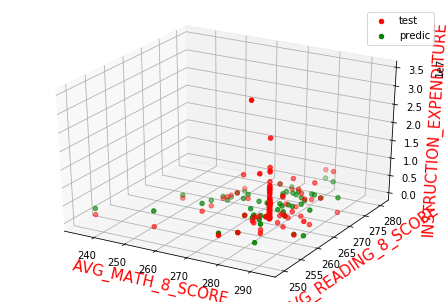

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
 
# data
 
x1 = X_test['AVG_MATH_8_SCORE']  
y1 = X_test['AVG_READING_8_SCORE']
z1 = y_test.astype(int)
 
# data２
x2 = X_test['AVG_MATH_8_SCORE']  
y2 = X_test['AVG_READING_8_SCORE']
z2 = clf.predict(X_test)
 
 
 
# scatter 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x1, y1, z1, c='r', label='test')
ax.scatter(x2, y2, z2, c='g', label='predic')
 
ax.legend(loc='best')
 
ax.set_zlabel('INSTRUCTION_EXPENDITURE', fontdict={'size': 15, 'color': 'red'})
ax.set_ylabel('AVG_READING_8_SCORE', fontdict={'size': 15, 'color': 'red'})
ax.set_xlabel('AVG_MATH_8_SCORE', fontdict={'size': 15, 'color': 'red'})
 
plt.show()

In [134]:
data = pd.read_csv('states_all.csv', index_col = 'PRIMARY_KEY')

In [135]:
from sklearn.impute import SimpleImputer

data = data.drop(['GRADES_12_G', 'GRADES_9_12_G','GRADES_1_8_G', 'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_ALL_G'],1)
data = data.drop(columns = ['STATE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'])
my_imputer = SimpleImputer()
data_imputed = my_imputer.fit_transform(data)
print (data_imputed)
data_imputed = pd.DataFrame(data_imputed,columns=data.columns)
data_imputed

[[1.99200000e+03 9.17541566e+05 2.67888500e+06 ... 5.79480000e+04
  5.80250000e+04 2.08327876e+02]
 [1.99200000e+03 9.17541566e+05 1.04959100e+06 ... 9.74800000e+03
  8.78900000e+03 2.34797280e+02]
 [1.99200000e+03 9.17541566e+05 3.25807900e+06 ... 5.54330000e+04
  4.90810000e+04 2.15253932e+02]
 ...
 [2.01700000e+03 9.17541566e+05 9.10204493e+06 ... 6.91665080e+04
  6.81065374e+04 2.34043993e+02]
 [2.01700000e+03 9.17541566e+05 9.10204493e+06 ... 6.91665080e+04
  6.81065374e+04 2.41588947e+02]
 [2.01700000e+03 9.17541566e+05 9.10204493e+06 ... 6.91665080e+04
  6.81065374e+04 2.36057019e+02]]


,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_4_G,GRADES_8_G,AVG_MATH_4_SCORE
0,1992.0,917541.566176,2.678885e+06,3.041770e+05,1.659028e+06,7.156800e+05,2.653798e+06,1.481703e+06,7.350360e+05,429950.933824,1.740530e+05,57948.000000,58025.000000,208.327876
1,1992.0,917541.566176,1.049591e+06,1.067800e+05,7.207110e+05,2.221000e+05,9.724880e+05,4.983620e+05,3.509020e+05,429950.933824,3.745100e+04,9748.000000,8789.000000,234.797280
2,1992.0,917541.566176,3.258079e+06,2.978880e+05,1.369815e+06,1.590376e+06,3.401580e+06,1.435908e+06,1.007732e+06,429950.933824,6.091140e+05,55433.000000,49081.000000,215.253932
3,1992.0,917541.566176,1.711959e+06,1.785710e+05,9.587850e+05,5.746030e+05,1.743022e+06,9.643230e+05,4.834880e+05,429950.933824,1.452120e+05,34632.000000,36011.000000,210.206028
4,1992.0,917541.566176,2.626002e+07,2.072470e+06,1.654651e+07,7.641041e+06,2.713883e+07,1.435892e+07,8.520926e+06,429950.933824,2.044688e+06,418418.000000,363296.000000,208.398961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,2017.0,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,429950.933824,9.034675e+05,69166.507966,68106.537377,244.243515
1914,2017.0,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,429950.933824,9.034675e+05,69166.507966,68106.537377,237.554934
1915,2017.0,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,429950.933824,9.034675e+05,69166.507966,68106.537377,234.043993
1916,2017.0,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,429950.933824,9.034675e+05,69166.507966,68106.537377,241.588947


define a score better than the mean score as good '1' and the other score as bad '0'

In [136]:
def fun(x):
    if x >= data_imputed.loc[:,'AVG_MATH_4_SCORE'].mean():
        return 1
    else:
        return 0

In [137]:
data_imputed.loc[:,'AVG_MATH_4_SCORE'] = data_imputed.loc[:,'AVG_MATH_4_SCORE'].apply(lambda x: fun(x))

In [138]:
X = data_imputed.loc[:,['TOTAL_REVENUE','INSTRUCTION_EXPENDITURE']]
y = data_imputed.loc[:,'AVG_MATH_4_SCORE']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=100)

In [139]:
#fit on training data
clf.fit(X_train, y_train.astype(int))

#predict test
preds = clf.predict(X_test)

#measure performance
print(clf.score(X_test,y_test.astype(int)))

#See if overfit
print(clf.score(X_train,y_train.astype(int)))

0.828125
0.8331402085747392


looks better than before!

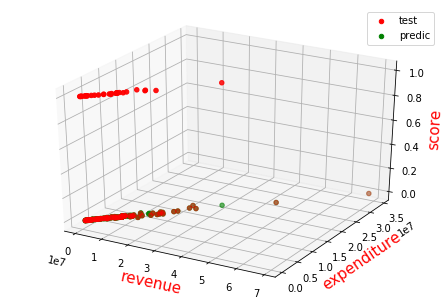

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x1 = X_test['TOTAL_REVENUE']  
y1 = X_test['INSTRUCTION_EXPENDITURE']
z1 = y_test.astype(int)
 
x2 = X_test['TOTAL_REVENUE']  
y2 = X_test['INSTRUCTION_EXPENDITURE']
z2 = clf.predict(X_test)
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x1, y1, z1, c='r', label='test')
ax.scatter(x2, y2, z2, c='g', label='predic')
 
ax.legend(loc='best')
 
ax.set_zlabel('score', fontdict={'size': 15, 'color': 'red'})
ax.set_ylabel('expenditure', fontdict={'size': 15, 'color': 'red'})
ax.set_xlabel('revenue', fontdict={'size': 15, 'color': 'red'})
 
plt.show()

In [141]:
data = pd.read_csv('states_all.csv', index_col = 'PRIMARY_KEY')
from sklearn.impute import SimpleImputer

data = data.drop(['GRADES_12_G', 'GRADES_9_12_G','GRADES_1_8_G', 'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_ALL_G'],1)
data = data.drop(columns = ['STATE','AVG_READING_4_SCORE', 'AVG_MATH_4_SCORE'])
my_imputer = SimpleImputer()
data_imputed = my_imputer.fit_transform(data)
print (data_imputed)
data_imputed = pd.DataFrame(data_imputed,columns=data.columns)
data_imputed

[[1.99200000e+03 9.17541566e+05 2.67888500e+06 ... 5.80250000e+04
  2.52187522e+02 2.63683325e+02]
 [1.99200000e+03 9.17541566e+05 1.04959100e+06 ... 8.78900000e+03
  2.78461453e+02 2.58859712e+02]
 [1.99200000e+03 9.17541566e+05 3.25807900e+06 ... 4.90810000e+04
  2.65366278e+02 2.62169895e+02]
 ...
 [2.01700000e+03 9.17541566e+05 9.10204493e+06 ... 6.81065374e+04
  2.74673821e+02 2.65767860e+02]
 [2.01700000e+03 9.17541566e+05 9.10204493e+06 ... 6.81065374e+04
  2.86376160e+02 2.59753002e+02]
 [2.01700000e+03 9.17541566e+05 9.10204493e+06 ... 6.81065374e+04
  2.73415854e+02 2.71617023e+02]]


,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_4_G,GRADES_8_G,AVG_MATH_8_SCORE,AVG_READING_8_SCORE
0,1992.0,917541.566176,2.678885e+06,3.041770e+05,1.659028e+06,7.156800e+05,2.653798e+06,1.481703e+06,7.350360e+05,429950.933824,1.740530e+05,57948.000000,58025.000000,252.187522,263.683325
1,1992.0,917541.566176,1.049591e+06,1.067800e+05,7.207110e+05,2.221000e+05,9.724880e+05,4.983620e+05,3.509020e+05,429950.933824,3.745100e+04,9748.000000,8789.000000,278.461453,258.859712
2,1992.0,917541.566176,3.258079e+06,2.978880e+05,1.369815e+06,1.590376e+06,3.401580e+06,1.435908e+06,1.007732e+06,429950.933824,6.091140e+05,55433.000000,49081.000000,265.366278,262.169895
3,1992.0,917541.566176,1.711959e+06,1.785710e+05,9.587850e+05,5.746030e+05,1.743022e+06,9.643230e+05,4.834880e+05,429950.933824,1.452120e+05,34632.000000,36011.000000,256.312090,264.619665
4,1992.0,917541.566176,2.626002e+07,2.072470e+06,1.654651e+07,7.641041e+06,2.713883e+07,1.435892e+07,8.520926e+06,429950.933824,2.044688e+06,418418.000000,363296.000000,260.892247,263.683325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,2017.0,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,429950.933824,9.034675e+05,69166.507966,68106.537377,288.172322,262.720477
1914,2017.0,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,429950.933824,9.034675e+05,69166.507966,68106.537377,277.180126,269.553823
1915,2017.0,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,429950.933824,9.034675e+05,69166.507966,68106.537377,274.673821,265.767860
1916,2017.0,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,429950.933824,9.034675e+05,69166.507966,68106.537377,286.376160,259.753002


In [142]:
def fun(x):
    if x >= data_imputed.loc[:,'AVG_MATH_8_SCORE'].mean():
        return 1
    else:
        return 0

In [143]:
data_imputed.loc[:,'AVG_MATH_8_SCORE'] = data_imputed.loc[:,'AVG_MATH_8_SCORE'].apply(lambda x: fun(x))

In [144]:
X = data_imputed.loc[:,['TOTAL_REVENUE','INSTRUCTION_EXPENDITURE']]
y = data_imputed.loc[:,'AVG_MATH_8_SCORE']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=100)

In [145]:
#fit on training data
clf.fit(X_train, y_train.astype(int))

#predict test
preds = clf.predict(X_test)

#measure performance
print(clf.score(X_test,y_test.astype(int)))

#See if overfit
print(clf.score(X_train,y_train.astype(int)))

0.8854166666666666
0.8800695249130939


higher than the grade 4 predict module

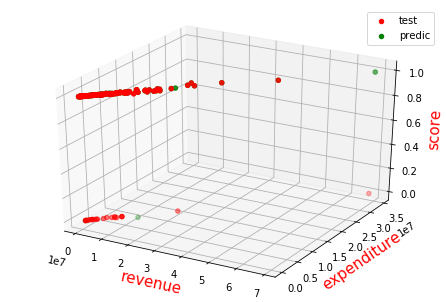

In [146]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x1 = X_test['TOTAL_REVENUE']  
y1 = X_test['INSTRUCTION_EXPENDITURE']
z1 = y_test.astype(int)
 
x2 = X_test['TOTAL_REVENUE']  
y2 = X_test['INSTRUCTION_EXPENDITURE']
z2 = clf.predict(X_test)
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x1, y1, z1, c='r', label='test')
ax.scatter(x2, y2, z2, c='g', label='predic')
 
ax.legend(loc='best')
 
ax.set_zlabel('score', fontdict={'size': 15, 'color': 'red'})
ax.set_ylabel('expenditure', fontdict={'size': 15, 'color': 'red'})
ax.set_xlabel('revenue', fontdict={'size': 15, 'color': 'red'})
 
plt.show()

use the grade 8 math and reading score to predict the instruction expenditure

In [147]:
data = pd.read_csv('states_all.csv', index_col = 'PRIMARY_KEY')

In [148]:
from sklearn.impute import SimpleImputer

data = data.drop(['GRADES_12_G', 'GRADES_9_12_G','GRADES_1_8_G', 'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_ALL_G'],1)
data = data.drop(columns = ['STATE','AVG_READING_4_SCORE', 'AVG_MATH_4_SCORE'])
my_imputer = SimpleImputer()
data_imputed = my_imputer.fit_transform(data)
print (data_imputed)
data_imputed = pd.DataFrame(data_imputed,columns=data.columns)
data_imputed

[[1.99200000e+03 9.17541566e+05 2.67888500e+06 ... 5.80250000e+04
  2.52187522e+02 2.63683325e+02]
 [1.99200000e+03 9.17541566e+05 1.04959100e+06 ... 8.78900000e+03
  2.78461453e+02 2.58859712e+02]
 [1.99200000e+03 9.17541566e+05 3.25807900e+06 ... 4.90810000e+04
  2.65366278e+02 2.62169895e+02]
 ...
 [2.01700000e+03 9.17541566e+05 9.10204493e+06 ... 6.81065374e+04
  2.74673821e+02 2.65767860e+02]
 [2.01700000e+03 9.17541566e+05 9.10204493e+06 ... 6.81065374e+04
  2.86376160e+02 2.59753002e+02]
 [2.01700000e+03 9.17541566e+05 9.10204493e+06 ... 6.81065374e+04
  2.73415854e+02 2.71617023e+02]]


,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_4_G,GRADES_8_G,AVG_MATH_8_SCORE,AVG_READING_8_SCORE
0,1992.0,917541.566176,2.678885e+06,3.041770e+05,1.659028e+06,7.156800e+05,2.653798e+06,1.481703e+06,7.350360e+05,429950.933824,1.740530e+05,57948.000000,58025.000000,252.187522,263.683325
1,1992.0,917541.566176,1.049591e+06,1.067800e+05,7.207110e+05,2.221000e+05,9.724880e+05,4.983620e+05,3.509020e+05,429950.933824,3.745100e+04,9748.000000,8789.000000,278.461453,258.859712
2,1992.0,917541.566176,3.258079e+06,2.978880e+05,1.369815e+06,1.590376e+06,3.401580e+06,1.435908e+06,1.007732e+06,429950.933824,6.091140e+05,55433.000000,49081.000000,265.366278,262.169895
3,1992.0,917541.566176,1.711959e+06,1.785710e+05,9.587850e+05,5.746030e+05,1.743022e+06,9.643230e+05,4.834880e+05,429950.933824,1.452120e+05,34632.000000,36011.000000,256.312090,264.619665
4,1992.0,917541.566176,2.626002e+07,2.072470e+06,1.654651e+07,7.641041e+06,2.713883e+07,1.435892e+07,8.520926e+06,429950.933824,2.044688e+06,418418.000000,363296.000000,260.892247,263.683325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,2017.0,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,429950.933824,9.034675e+05,69166.507966,68106.537377,288.172322,262.720477
1914,2017.0,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,429950.933824,9.034675e+05,69166.507966,68106.537377,277.180126,269.553823
1915,2017.0,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,429950.933824,9.034675e+05,69166.507966,68106.537377,274.673821,265.767860
1916,2017.0,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,429950.933824,9.034675e+05,69166.507966,68106.537377,286.376160,259.753002


define the instruction expenditure as the same way

In [149]:
def fun(x):
    if x >= data_imputed.loc[:,'INSTRUCTION_EXPENDITURE'].mean():
        return 1
    else:
        return 0

In [150]:
data_imputed.loc[:,'AVG_MATH_8_SCORE'] = data_imputed.loc[:,'AVG_MATH_8_SCORE'].apply(lambda x: fun(x))

In [151]:
X = data_imputed.loc[:,['AVG_MATH_8_SCORE','AVG_READING_8_SCORE']]
y = data_imputed.loc[:,'INSTRUCTION_EXPENDITURE']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=100)

In [152]:
#fit on training data
clf.fit(X_train, y_train.astype(int))

#predict test
preds = clf.predict(X_test)

#measure performance
print(clf.score(X_test,y_test.astype(int)))

#See if overfit
print(clf.score(X_train,y_train.astype(int)))

0.3541666666666667
0.3331402085747393


can not get a good model

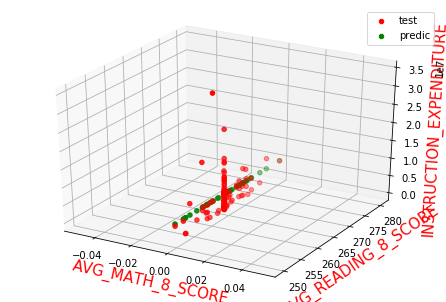

In [153]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
 
x1 = X_test['AVG_MATH_8_SCORE']  
y1 = X_test['AVG_READING_8_SCORE']
z1 = y_test.astype(int)
 
x2 = X_test['AVG_MATH_8_SCORE']  
y2 = X_test['AVG_READING_8_SCORE']
z2 = clf.predict(X_test) 

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x1, y1, z1, c='r', label='test')
ax.scatter(x2, y2, z2, c='g', label='predic')
 
ax.legend(loc='best')
 
ax.set_zlabel('INSTRUCTION_EXPENDITURE', fontdict={'size': 15, 'color': 'red'})
ax.set_ylabel('AVG_READING_8_SCORE', fontdict={'size': 15, 'color': 'red'})
ax.set_xlabel('AVG_MATH_8_SCORE', fontdict={'size': 15, 'color': 'red'})
 
plt.show()

# conclusion
### 1.We can predict academic performance by given instruction expenditure, but it is hard to figure out the investment we need to help student reach certain academic level. 
### 2.The academic performance of the upper grades are easier to predict, because the upper grade students have been experienced longer academic training , thus, investment in education has a greater impact on the upper grade students.